In [1]:
import zipfile
with zipfile.ZipFile('./dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./images')

In [2]:
!pip install tensorflow
!pip install keras

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted

In [15]:
import tensorflow as tf
import keras

In [16]:
PATH = './images/images/collectedimages'
CLASS_NAMES = ['hello', 'fine', 'no', 'thankyou', 'yes']
BATCH_SIZE = 32

In [17]:
dataset = tf.keras.utils.image_dataset_from_directory(
    PATH,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2, 
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 150 files belonging to 5 classes.
Using 120 files for training.


In [18]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    PATH,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2, 
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 150 files belonging to 5 classes.
Using 120 files for training.


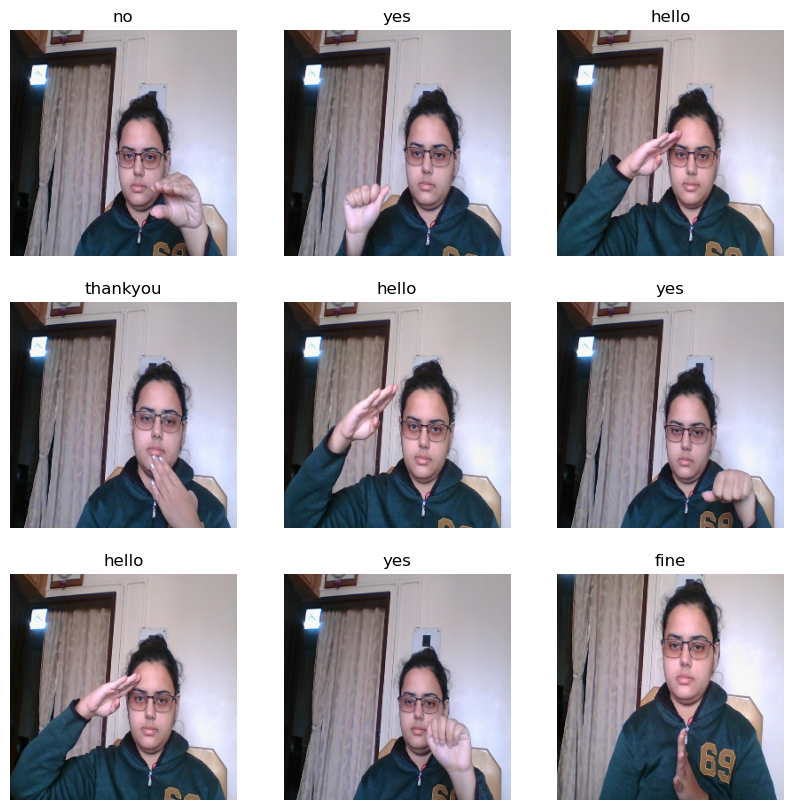

In [19]:
import matplotlib.pyplot as plt

class_names = ['hello', 'fine', 'no', 'thankyou', 'yes']
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 256)     7168      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 256)     0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 512)     1180160   
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 512)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 512)       2359808   
                                                                 
Total params: 3547136 (13.53 MB)
Trainable params: 354

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10))

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [27]:
history = model.fit(
  dataset,
  batch_size=BATCH_SIZE,
  validation_data=validation_dataset,
  epochs=10
)

Epoch 1/10


4/4 [==============================] - 167s 42s/step - loss: 1.8467 - accuracy: 0.4500 - val_loss: 1.6096 - val_accuracy: 0.2917
Epoch 2/10
4/4 [==============================] - 149s 39s/step - loss: 1.4991 - accuracy: 0.4000 - val_loss: 1.1008 - val_accuracy: 0.5667
Epoch 3/10
4/4 [==============================] - 217s 58s/step - loss: 0.9386 - accuracy: 0.6250 - val_loss: 0.7171 - val_accuracy: 0.6667
Epoch 4/10
4/4 [==============================] - 184s 47s/step - loss: 0.6192 - accuracy: 0.7333 - val_loss: 0.4657 - val_accuracy: 0.7917
Epoch 5/10
4/4 [==============================] - 166s 44s/step - loss: 0.3928 - accuracy: 0.8250 - val_loss: 0.1785 - val_accuracy: 0.9417
Epoch 6/10
4/4 [==============================] - 163s 41s/step - loss: 0.1828 - accuracy: 0.9333 - val_loss: 0.0911 - val_accuracy: 0.9750
Epoch 7/10
4/4 [==============================] - 163s 38s/step - loss: 0.0708 - accuracy: 0.9917 - val_loss: 0.0471 - val_accuracy: 0.9917
Epoch 8/10
4/4 [===============

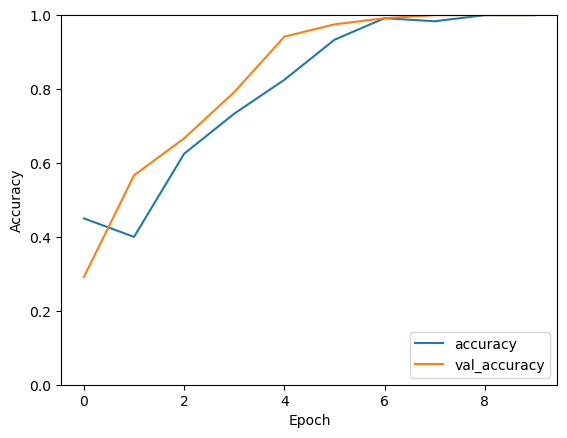

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')